# Load Library

In [ ]:
 ! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 107 kB/s 


In [ ]:
! pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 5.3 MB/s 
     |████████████████████████████████| 255.9 MB 30 kB/s 
     |████████████████████████████████| 72 kB 791 kB/s 
     |████████████████████████████████| 26.7 MB 1.6 MB/s 
     |████████████████████████████████| 2.0 MB 45.5 MB/s 
     |████████████████████████████████| 96 kB 5.1 MB/s 
     |████████████████████████████████| 3.2 MB 44.4 MB/s 
     |████████████████████████████████| 1.6 MB 42.3 MB/s 
     |████████████████████████████████| 121 kB 48.9 MB/s 
     |████████████████████████████████| 83 kB 2.1 MB/s 
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 6.0.1
    Uninstalling pyarrow-6.0.1:
      Successfully uninstalled pyarrow-6.0.1
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
  Attempting uninstall: xgbo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from featurewiz import featurewiz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
#drive ferry
df = pd.read_csv('/content/drive/MyDrive/data science/final project/hotel_booking_after_preprocessing.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.sample(5)

,hotel,is_canceled,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,lead_time_norm,adr_norm,total_of_special_requests_norm,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_GDS,deposit_type_No Deposit,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,reserved_vs_assigned,season_autumn,season_spring,season_summer,season_winter,origin_type
82530,0,0,49,29,0,4,2,0,0,0,0,0,2,0,0,0.353553,0.307346,0.4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
69426,0,0,17,17,2,1,2,0,0,0,0,0,0,0,0,0.336463,0.349347,0.2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1
44188,0,1,42,13,0,3,2,0,0,0,0,0,0,0,0,0.295405,0.414479,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1
49755,0,1,12,23,1,3,2,0,0,0,0,0,0,0,0,0.366652,0.395926,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0
49919,0,1,13,30,1,3,2,0,0,0,0,0,0,0,0,0.385467,0.343031,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0


# A. Split Data Train & Test 

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces', 'lead_time_norm',
       'adr_norm', 'total_of_special_requests_norm', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Corporate', 'distribution_channel_GDS',
       'deposit_type_No Deposit', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Group',
       'customer_type_Transient', 'reserved_vs_assigned', 'season_autumn',
       'season_sprin

In [ ]:
x = df[['hotel', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces', 'lead_time_norm',
       'adr_norm', 'total_of_special_requests_norm', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Corporate', 'distribution_channel_GDS',
       'deposit_type_No Deposit', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Group',
       'customer_type_Transient', 'reserved_vs_assigned', 'season_autumn',
       'season_spring', 'season_summer', 'season_winter', 'origin_type']]

y = df[['is_canceled']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(68160, 42)
(29212, 42)
(68160, 1)
(29212, 1)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, x, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(x_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(x_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(x_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [ ]:
df.is_canceled.value_counts(normalize=True)

0    0.604599
1    0.395401
Name: is_canceled, dtype: float64

# B. Modeling 

In [ ]:
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(x_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.81
Recall (Test Set): 0.65
F1-Score (Test Set): 0.72
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.88
roc_auc (crossval train): 0.8868623863826534
roc_auc (crossval test): 0.8223497927942793


In [ ]:
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.74
Recall (Test Set): 0.69
F1-Score (Test Set): 0.72
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.94
roc_auc (crossval train): 0.9546183657346521
roc_auc (crossval test): 0.41561540130217106


In [ ]:
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(x_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.79
Recall (Test Set): 0.79
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.83
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999435221801564
roc_auc (crossval test): 0.5993184773431997


In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)
eval_classification(nb)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.70
Recall (Test Set): 0.67
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.82
roc_auc (crossval train): 0.8248939314723076
roc_auc (crossval test): 0.7611142123508935


In [ ]:
xg = XGBClassifier()
xg.fit(x_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.84
Recall (Test Set): 0.78
F1-Score (Test Set): 0.81
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.95
roc_auc (crossval train): 0.9629270043369056
roc_auc (crossval test): 0.7314855352002694


In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.87
Recall (Test Set): 0.80
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.94
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.999579103206085
roc_auc (crossval test): 0.696955434230999


In [ ]:
cb = CatBoostClassifier(verbose=False)
cb.fit(x_train, y_train)
eval_classification(cb)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.85
Recall (Test Set): 0.78
F1-Score (Test Set): 0.81
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.95
roc_auc (crossval train): 0.9631764202085247
roc_auc (crossval test): 0.7367633942583907


In [ ]:
ab = AdaBoostClassifier()
ab.fit(x_train, y_train)
eval_classification(ab)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.81
Recall (Test Set): 0.68
F1-Score (Test Set): 0.74
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.8995258366727683
roc_auc (crossval test): 0.8243619868363969


# C. Model Evaluation: Pemilihan dan perhitungan metrics model

Metriks yang digunakan untuk project ini adalah recall. Pemilihan recall dengan tujuan untuk menekan angka false negatif (diprediksi tidak cancel ternyata iya). Dengan menekan angka false negatif sekecil mungkin, selain dapat menurunkan cancel rate, maka tim bisnis juga dapat lebih fokus kepada customer yang diprediksi  false positif (diprediksi cancel ternyata tidak) sehingga cost untuk mempertahankan customer agar tidak cancel menjadi berkurang.

In [ ]:
feats = featurewiz(df, 'is_canceled', corr_limit=0.7, verbose=0)
len(feats)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (97372, 43)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#################################

2

In [ ]:
feats[0]

['deposit_type_No Deposit',
 'previous_cancellations',
 'deposit_type_Refundable',
 'market_segment_Online TA',
 'reserved_vs_assigned',
 'total_of_special_requests_norm',
 'origin_type',
 'customer_type_Transient',
 'meal_Undefined',
 'season_winter',
 'lead_time_norm',
 'hotel',
 'booking_changes',
 'market_segment_Groups']

# D. Model Evaluation: Apakah model sudah best-fit?

memilih model yang memiliki recall paling tinggi dengan treshold roc_auc validation tidak lebih dari 10%

In [ ]:
x_new = df[['deposit_type_No Deposit',
 'previous_cancellations',
 'market_segment_Online TA',
 'reserved_vs_assigned',
 'deposit_type_Refundable',
 'total_of_special_requests_norm',
 'origin_type',
 'customer_type_Transient',
 'booking_changes',
 'lead_time_norm',
 'season_winter',
 'hotel',
 'meal_Undefined',
 'market_segment_Groups']]

x_new_train, x_new_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification_new(model):
    y_pred = model.predict(x_new_test)
    y_pred_train = model.predict(x_new_train)
    y_pred_proba = model.predict_proba(x_new_test)
    y_pred_proba_train = model.predict_proba(x_new_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, x_new, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
print(x_new_train.shape)
print(x_new_test.shape)
print(y_train.shape)
print(y_test.shape)

(68160, 14)
(29212, 14)
(68160, 1)
(29212, 1)


In [ ]:
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(x_new_train, y_train) # fit model regression dari data train
eval_classification_new(logreg)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.80
Recall (Test Set): 0.64
F1-Score (Test Set): 0.71
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.88
roc_auc (crossval train): 0.8787877841823228
roc_auc (crossval test): 0.8671327092537299


In [ ]:
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_new_train, y_train) # fit model KNN dari data train
eval_classification_new(knn)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.79
Recall (Test Set): 0.76
F1-Score (Test Set): 0.77
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.8953872293316583
roc_auc (crossval test): 0.7821818341355065


In [ ]:
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(x_new_train, y_train) # fit model decision tree dari data train
eval_classification_new(dt)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.81
Recall (Test Set): 0.74
F1-Score (Test Set): 0.78
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.97
roc_auc (crossval train): 0.9652237956452675
roc_auc (crossval test): 0.7616318220033471


In [ ]:
nb = GaussianNB()
nb.fit(x_new_train, y_train)
eval_classification_new(nb)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.96
Recall (Test Set): 0.40
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.82
roc_auc (crossval train): 0.8244462579597128
roc_auc (crossval test): 0.8158865248273559


In [ ]:
xg = XGBClassifier()
xg.fit(x_new_train, y_train)
eval_classification_new(xg)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.83
Recall (Test Set): 0.75
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.9281577174747924
roc_auc (crossval test): 0.8661353135133683


In [ ]:
rf = RandomForestClassifier()
rf.fit(x_new_train, y_train)
eval_classification_new(rf)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.80
Recall (Test Set): 0.76
F1-Score (Test Set): 0.78
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9626430281075751
roc_auc (crossval test): 0.8218511291234034


In [ ]:
cb = CatBoostClassifier(verbose=False)
cb.fit(x_new_train, y_train)
eval_classification_new(cb)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.83
Recall (Test Set): 0.75
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.92
roc_auc (crossval train): 0.9291329712493284
roc_auc (crossval test): 0.867715757281512


In [ ]:
ab = AdaBoostClassifier()
ab.fit(x_new_train, y_train)
eval_classification_new(ab)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.80
Recall (Test Set): 0.69
F1-Score (Test Set): 0.74
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval train): 0.8899060373132919
roc_auc (crossval test): 0.8770397490400532


Setelah dilakukan modeling ulang, sebagian besar model mengalami pengurangan gap roc auc validation yang berarti bahwa model semakin dekat dengan best fit (tidak underfit ataupun overfit)

# E. Hyperparameter Tuning

Memilih XGBoost sebagai model yang terbaik

In [ ]:
hyperparameters = {
                   'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                  'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                   'tree_method' : ['auto', 'exact', 'approx', 'hist'],
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
                     'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],                  
                   'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]                    
                   }

xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, n_jobs=1)
xg_tuned.fit(x_new_train,y_train)

y_pred = xg_tuned.predict(x_new_train)
eval_classification_new(xg_tuned)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.83
Recall (Test Set): 0.75
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.9048440163099318
roc_auc (crossval test): 0.8683850598658698


In [ ]:
### hyperparameter yang digunakan 
print(xg_tuned.best_params_)

{'tree_method': 'approx', 'min_child_weight': 4, 'max_depth': 50, 'lambda': 0.6000000000000001, 'gamma': 1.0, 'eta': 0.31313131313131315, 'colsample_bytree': 0.7000000000000001, 'alpha': 0.6000000000000001}


In [ ]:
xg_new = XGBClassifier(tree_method = 'auto', min_child_weight =  4, max_depth = 50, reg_lambda = 0.6000000000000001, gamma = 1.0, eta = 0.31313131313131315, colsample_bytree = 0.7000000000000001, alpha = 0.6000000000000001)
xg_new.fit(x_new_train, y_train)
eval_classification_new(xg_new)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.82
Recall (Test Set): 0.76
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.94
roc_auc (crossval train): 0.9453924902804189
roc_auc (crossval test): 0.8556828075920082


Setelah melakukan hyperparameter tuning, roc_auc validation mengalami kenaikan menjadi 9% yang sebelumnya 6% (0.06 menjadi 0.09) tetapi recall mengalami kenaikan score sebesar 1% (75% -> 76%) 

In [ ]:
y_predicted = xg_new.predict(x_new_test)
y_predicted

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
print(len(y_test))

29212


In [ ]:
confusion_matrix(y_test,y_predicted)

array([[15676,  1914],
       [ 2822,  8800]])

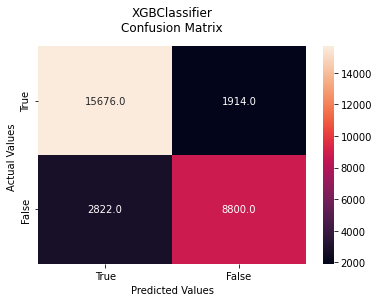

In [ ]:
cf_matrix = confusion_matrix(y_test, y_predicted)
ax = sns.heatmap(cf_matrix, annot=True, fmt='.1f')

plt.title('XGBClassifier\nConfusion Matrix', pad=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

plt.show()

# Feature Importances

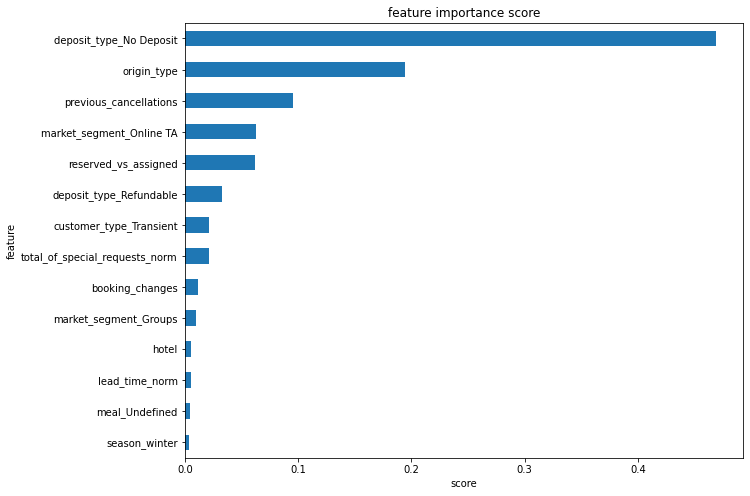

In [ ]:
feat_importances = pd.Series(xg_new.feature_importances_, index=x_new_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')
plt.show()

In [ ]:
feat_importances.nlargest(25)

deposit_type_No Deposit           0.469143
origin_type                       0.194785
previous_cancellations            0.095382
market_segment_Online TA          0.063013
reserved_vs_assigned              0.062217
deposit_type_Refundable           0.032435
customer_type_Transient           0.021636
total_of_special_requests_norm    0.020965
booking_changes                   0.011366
market_segment_Groups             0.009748
hotel                             0.005745
lead_time_norm                    0.005385
meal_Undefined                    0.004356
season_winter                     0.003824
dtype: float32

- deposite_type_No Deposit: kolerasi antara target (is_canceled) dengan fitur ‘Deposite_type_No Deposit’ adalah korelasi negative. Pihak hotel dapat menghapus Deposite_type_No Deposit. Atau no deposit hanya untuk customer dengan lead time yang kecil dengan asumsi waktu kedatangan yang dekat mengakibatkan kecil kemungkinan akan terjadi cancel
- origin_type : dilihat dari value fitur ‘origin_type’ customer internasional adalah customer yang dominan sebesar 60%. Pihak hotel perlu melakukan marketing yang dapat meningkatkan customer local. Salah satu promo yang bisa dilakukan adalah adanya promo hari libur nasional, misalnya promo hari kemerdekaan, promo libur sekolah
- previous_cancellations: fitur previous_cancellation berkorelasi positif dengan target (is_canceled) dan value 0 adalah value terbanyak sebesar 95%. Dapat diketahui bahwa customer yang belum pernah cancel memiliki kemungkinan akan melakukan cancel di pemesanan yang akan datang karena mereka belum merasakan efek / kerugian dr cancel yang dilakukan. Penghapusan pilihan deposit dengan tipe no deposit dapat menjadi salah satu efek jera yang dapat diberikan pihak hotel

